In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading dataset
data_path = 'facebook_marketplace_data.csv'

data = pd.read_csv(data_path)

data

,Link,Photo Url,Price,Name,City
0,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,160 000 лв.,Апартамент,Botevgrad
1,https://www.facebook.com/marketplace/np/item/5...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,180 лв.,Lorelli бебешко легло 60/120см matrix new,"София, България"
2,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,125 000 лв.,Продавам къща в село Миланово област София.,Своге
3,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,139 500 лв.,Къща в с. Костенец,Kostenets
4,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,128 960 лв.,Двустаен апартамент в Надежда,"София, България"
...,...,...,...,...,...
207,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,150 лв.,Фритюрник 5 л. Bereket \nС чугунена горелка.,Kyustendil
208,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,106 000 лв.,Продава апаратамент в Малинова долина,"София, България"
209,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,95 лв.,Премиум ПВЦ мраморни панели,"София, България"
210,https://www.facebook.com/marketplace/np/item/2...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,205 000 лв.,Двустаен апартамент в кв.Кръстова вада,"София, България"


In [ ]:
data.dtypes

In [378]:
data.rename(columns={'Name': 'Title'}, inplace=True)

In [379]:
# Adding item type based on the title 
def classify_item(name):
    if 'апартамент' in name.lower():
        return 'Apartment'
    elif 'къща' in name.lower():
        return 'House'
    elif 'легло' in name.lower():
        return 'Bed'
    else:
        return 'Others'

data['Item Type'] = data['Title'].apply(classify_item)

In [380]:
print("Check for missing values:")
print(data.isnull().sum())

Check for missing values:
Link         0
Photo Url    0
Price        0
Title        0
City         0
Item Type    0
dtype: int64


In [381]:
print("Check for NaN values:")
print(data.isna().sum())

Check for NaN values:
Link         0
Photo Url    0
Price        0
Title        0
City         0
Item Type    0
dtype: int64


In [382]:
print("Checking for infinite values:")
print((data == float('inf')).sum())

Checking for infinite values:
Link         0
Photo Url    0
Price        0
Title        0
City         0
Item Type    0
dtype: int64


In [383]:
data.dtypes

Link         object
Photo Url    object
Price        object
Title        object
City         object
Item Type    object
dtype: object

In [384]:
# Price cleanup
def clean_price(price_str):
    # Remove "лв.", commas, etc.
    price_str = price_str.replace(' лв.', '').replace(' ', '').replace(',', '')

    try:
        return float(price_str)
    except ValueError:
        # In case we cannot convert, return NaN
        return np.nan

In [385]:
# Cities cleanup
cyrillic_to_latin = {
    'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd',
    'е': 'e', 'ж': 'zh', 'з': 'z', 'и': 'i', 'й': 'y',
    'к': 'k', 'л': 'l', 'м': 'm', 'н': 'n', 'о': 'o',
    'п': 'p', 'р': 'r', 'с': 's', 'т': 't', 'у': 'u', 
    'ф': 'f', 'х': 'h', 'ц': 'ts', 'ч': 'ch', 'ш': 'sh',
    'щ': 'sht', 'ъ': 'a', 'ь': 'y', 'ю': 'yu', 'я': 'ya'
}

data['City'] = data['City'].str.replace('България', '').str.strip()
data['City'] = data['City'].str.replace('Bulgaria', '').str.strip()
data['City'] = data['City'].str.replace(',', '')
data['City'] = data['City'].str.lower()

for key in cyrillic_to_latin.keys():
    data['City'] = data['City'].str.replace(key, cyrillic_to_latin[key])

data['City'] = data['City'].str.capitalize()

data['City']

0       Botevgrad
1          Sofiya
2           Svoge
3       Kostenets
4          Sofiya
          ...    
207    Kyustendil
208        Sofiya
209        Sofiya
210        Sofiya
211        Sofiya
Name: City, Length: 212, dtype: object

In [386]:
# Remove rows with missing Price or City data
data = data.dropna(subset=['Price', 'City'])

In [387]:
# Visualization Properties
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [388]:
# --- Data Cleanup ---

# Character cleanup
data['Price'] = data['Price'].replace(r'[^\d]', '', regex=True)

# Numeric convertion
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Remove rows with missing price
data = data.dropna(subset=['Price'])

In [389]:
data

,Link,Photo Url,Price,Title,City,Item Type
0,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,160000,Апартамент,Botevgrad,Apartment
1,https://www.facebook.com/marketplace/np/item/5...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,180,Lorelli бебешко легло 60/120см matrix new,Sofiya,Bed
2,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,125000,Продавам къща в село Миланово област София.,Svoge,House
3,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,139500,Къща в с. Костенец,Kostenets,House
4,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,128960,Двустаен апартамент в Надежда,Sofiya,Apartment
...,...,...,...,...,...,...
207,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,150,Фритюрник 5 л. Bereket \nС чугунена горелка.,Kyustendil,Others
208,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,106000,Продава апаратамент в Малинова долина,Sofiya,Others
209,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,95,Премиум ПВЦ мраморни панели,Sofiya,Others
210,https://www.facebook.com/marketplace/np/item/2...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,205000,Двустаен апартамент в кв.Кръстова вада,Sofiya,Apartment


In [390]:
data.dtypes

Link         object
Photo Url    object
Price         int64
Title        object
City         object
Item Type    object
dtype: object

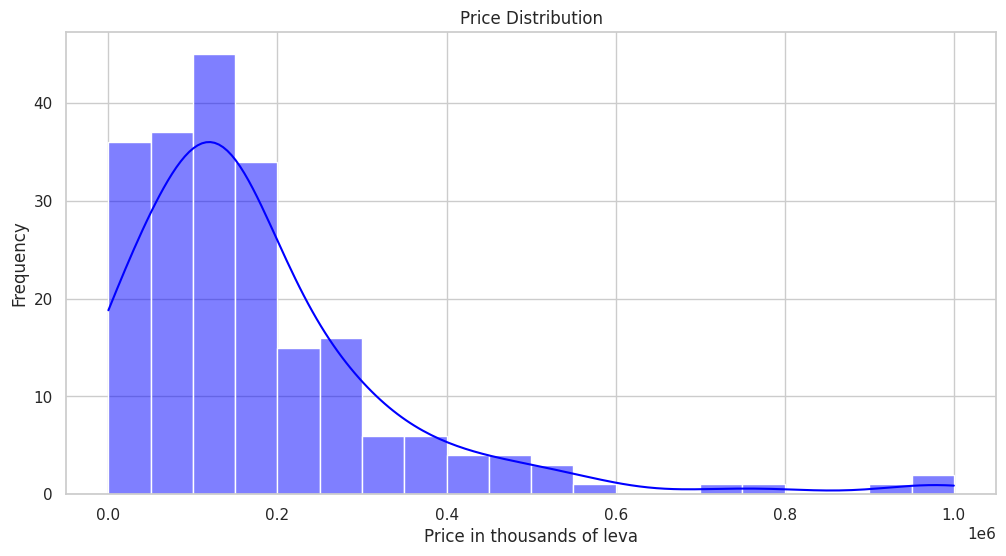

In [391]:
# --- Data Analysis ---

# Price Distribution
plt.figure()
sns.histplot(data['Price'], bins=20, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price in thousands of leva')
plt.ylabel('Frequency')
plt.show()

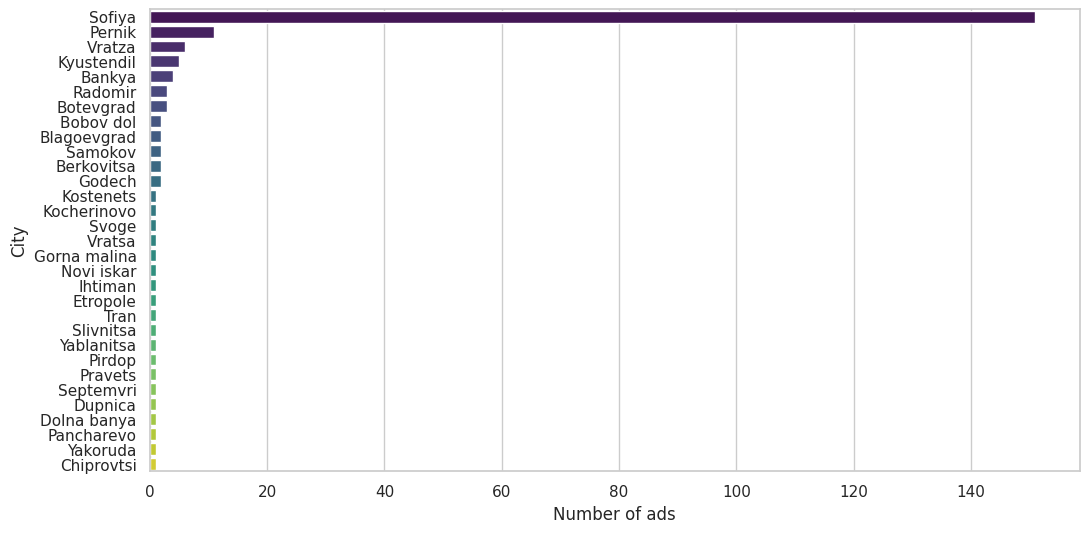

In [ ]:
# Top 10 cities based on number of ads
top_cities = data['City'].value_counts()
plt.figure()
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='viridis', legend=False)
plt.xlabel('Number of ads')
plt.ylabel('City')
plt.show()

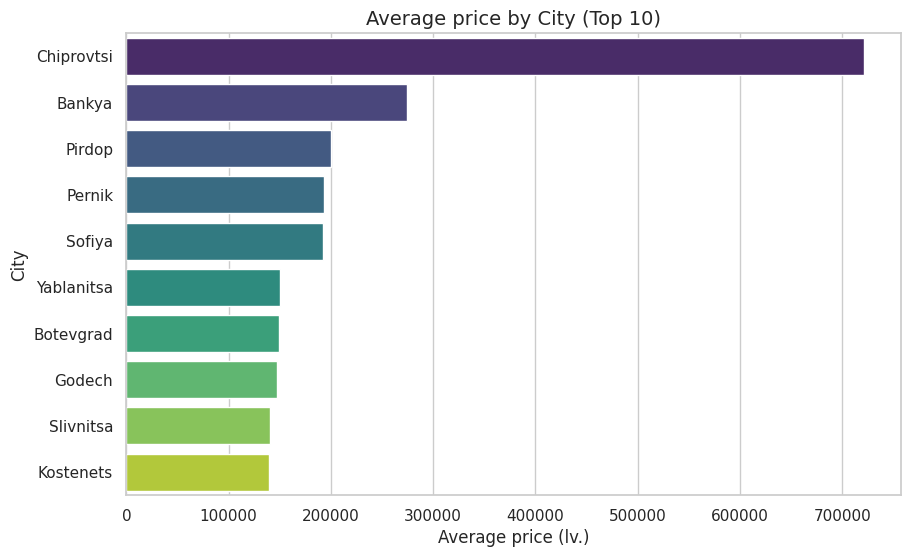

In [393]:
# Average price by City (top 10 cities)
mean_prices_by_city = data.groupby('City')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_prices_by_city.values, y=mean_prices_by_city.index, hue=mean_prices_by_city.index, palette='viridis')
plt.title('Average price by City (Top 10)', fontsize=14)
plt.xlabel('Average price (lv.)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

In [394]:
from collections import Counter
import re

# Remove leading and following whitespace
data['Title'] = data['Title'].str.strip()

# Text conversion into lowercase and unnecessary symbols removal
data['Title'] = data['Title'].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Splitting the text into words and creating a list
all_words = ' '.join(data['Title'].tolist()).split()

# Word frequency
word_counts = Counter(all_words)

# Sort by frequency
common_words = word_counts.most_common()

print("Top 10 most frequently used words in the 'Title' column:")
for word, count in common_words[:10]:
    print(f"{word}: {count}")


Top 10 most frequently used words in the 'Title' column:
в: 93
апартамент: 69
къща: 40
тристаен: 38
с: 36
на: 33
двустаен: 27
продавам: 23
кв: 20
софия: 17


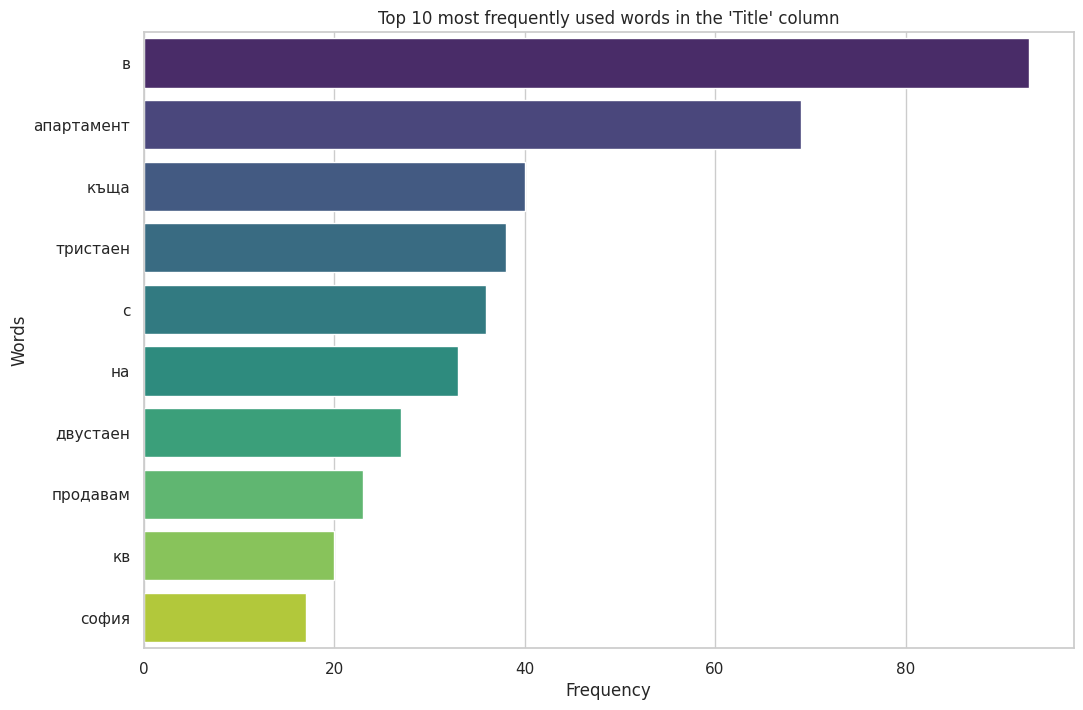

In [ ]:
# Zipping the words and their frequency
words, counts = zip(*common_words[:10])

# Bar plot creation
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), hue=list(words), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title("Top 10 most frequently used words in the 'Title' column")
plt.show()


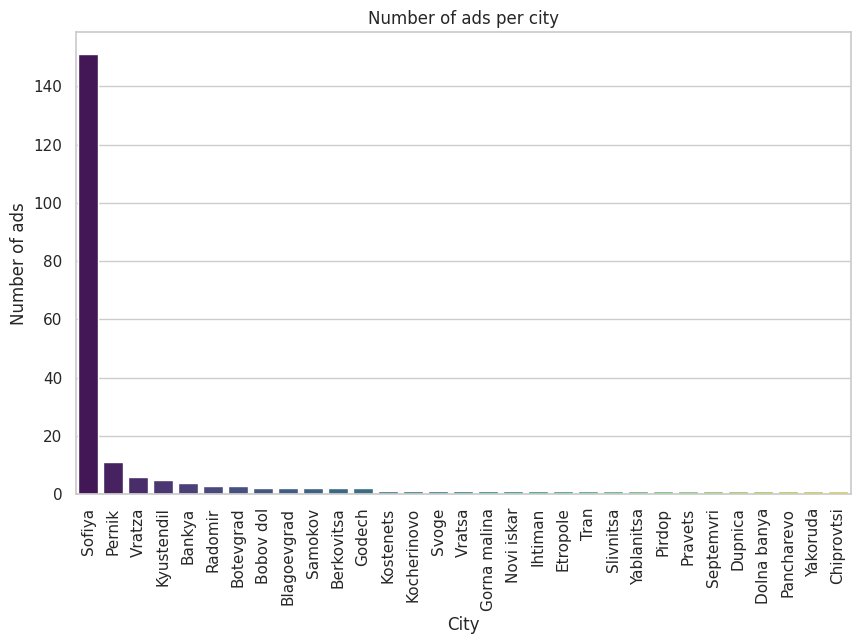

In [396]:
city_counts = data['City'].value_counts() 

plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, dodge=False, palette='viridis', legend=False)
plt.title('Number of ads per city') 
plt.xlabel('City')
plt.ylabel('Number of ads')
plt.xticks(rotation=90)
plt.show()

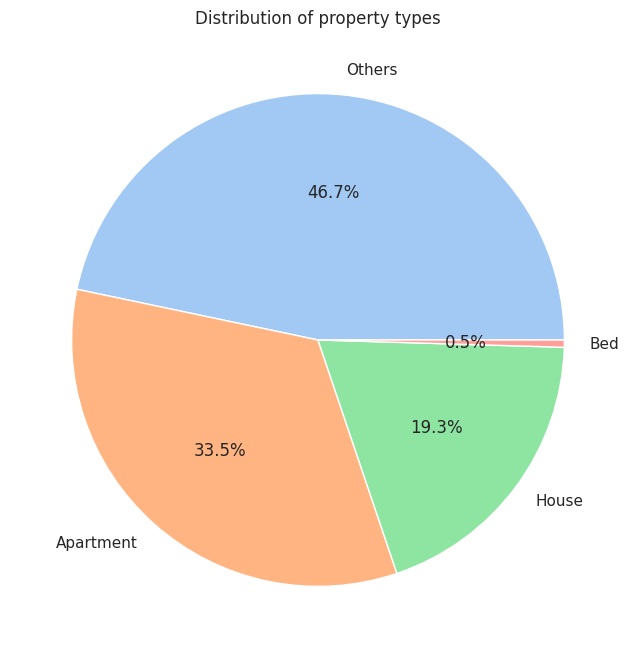

In [397]:

# Pie diagram for property type
def classify_item(title):
    if 'апартамент' in title.lower():
        return 'Apartment'
    elif 'къща' in title.lower():
        return 'House'
    elif 'легло' in title.lower():
        return 'Bed'
    else:
        return 'Others'

data['Item Type'] = data['Title'].apply(classify_item)
item_type_counts = data['Item Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of property types')
plt.show()


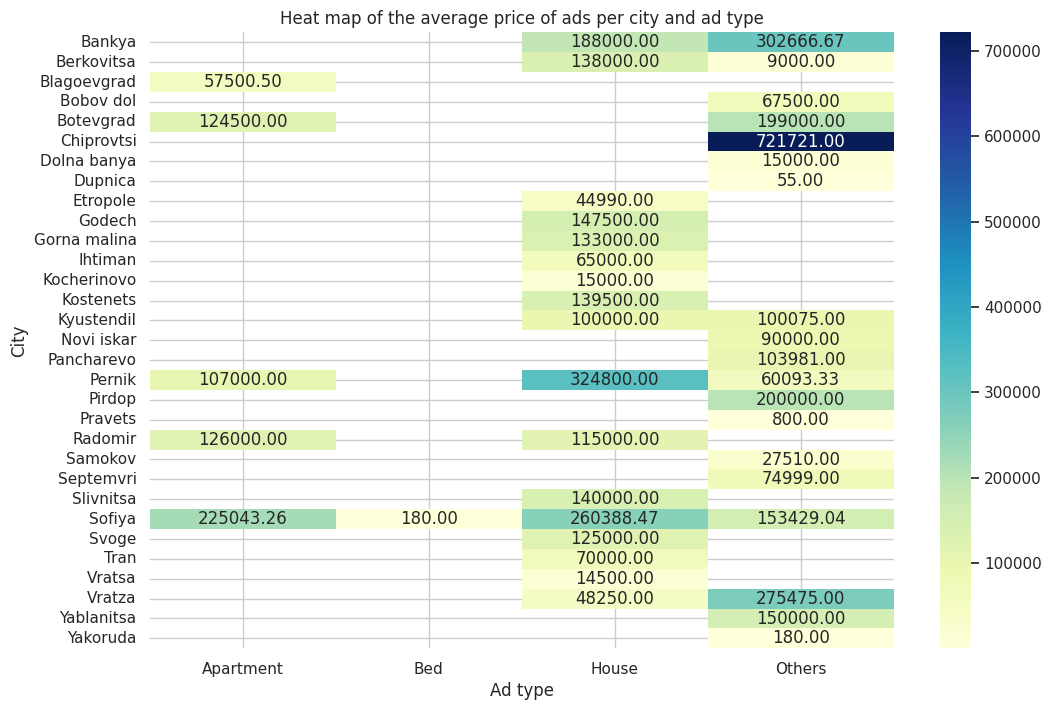

In [398]:
# Pivot table for average price of ads per city and property type
pivot_table = data.pivot_table(values='Price', index='City', columns='Item Type', aggfunc='mean')

# Heat map
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heat map of the average price of ads per city and ad type')
plt.xlabel('Ad type')
plt.ylabel('City')
plt.show()
